<a href="https://colab.research.google.com/github/aibalit200/almat/blob/main/welcome/running_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)
df = df[['country', 'year', 'primary_energy_consumption', 'population']].copy()
df.columns = ['Страна', 'Год', 'Потребление энергии (ТВт·ч)', 'Население']
df.dropna(inplace=True)

Загружаем и подготавливаем данные о мировом энергопотреблении. Оставляем только нужные колонки, переименовываем их и удаляем строки с пропущенными значениямзначениями

In [67]:
latest_year = df['Год'].max()
df_latest = df[df['Год'] == latest_year].copy()
df_latest['Потребление на душу населения (МВт·ч/чел)'] = df_latest['Потребление энергии (ТВт·ч)'] * 1e6 / df_latest['Население']
top_10 = df_latest.nlargest(10, 'Потребление энергии (ТВт·ч)')

display(top_10.style.set_properties(**{'background-color': 'white', 'color': 'black'}))

,Страна,Год,Потребление энергии (ТВт·ч),Население,Потребление на душу населения (МВт·ч/чел)
21427,World,2023,172119.062000,8045311488.000000,21.393710
1327,Asia,2023,91422.266000,4751819668.000000,19.239422
20733,Upper-middle-income countries,2023,76803.555000,2561245873.000000,29.986795
8919,High-income countries,2023,64908.398000,1228595591.000000,52.831378
4505,China,2023,47427.562000,1425671296.000000,33.266828
14153,North America,2023,33019.293000,604182945.000000,54.651150
6824,Europe,2023,28666.621000,743532558.000000,38.554628
20492,United States,2023,26189.199000,339996576.000000,77.027832
11233,Lower-middle-income countries,2023,21152.625000,3486412598.000000,6.067161
7190,European Union (27),2023,15662.042000,448922254.000000,34.888094


Выбираем данные за последний год, вычисляем потребление энергии на душу населения и выделяем 10 стран с наибольшим общим энергопотреблением.


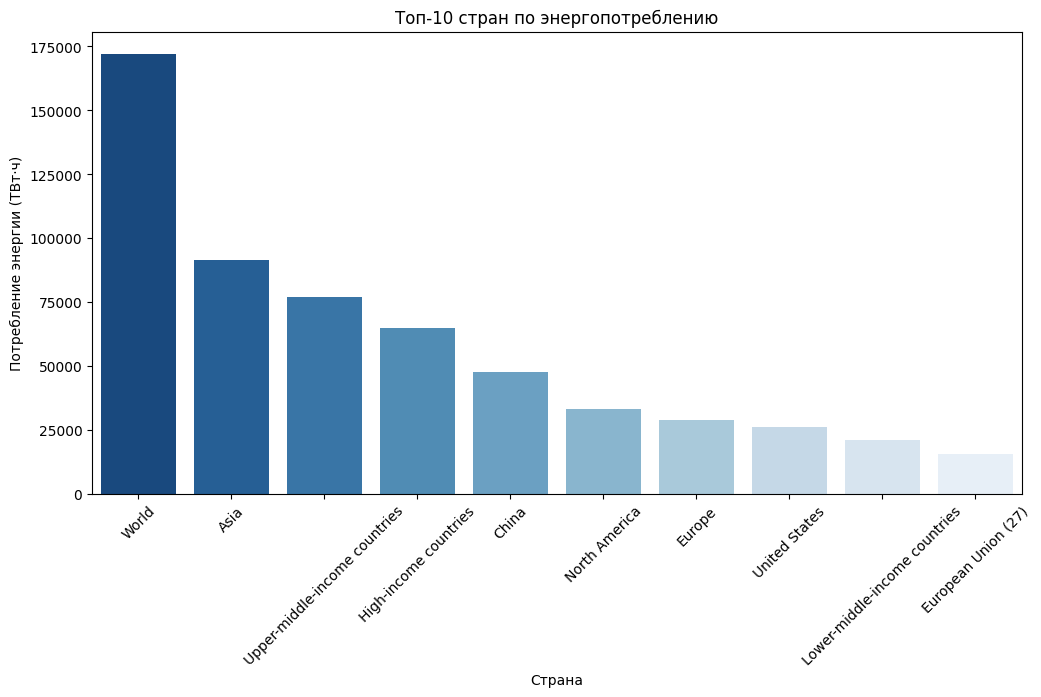

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Страна', y='Потребление энергии (ТВт·ч)', hue='Страна', dodge=False, palette='Blues_r', legend=False)
plt.xticks(rotation=45)
plt.ylabel("Потребление энергии (ТВт·ч)")
plt.title("Топ-10 стран по энергопотреблению")
plt.show()

Строим гистограмму энергопотребления в топ-10 странах.


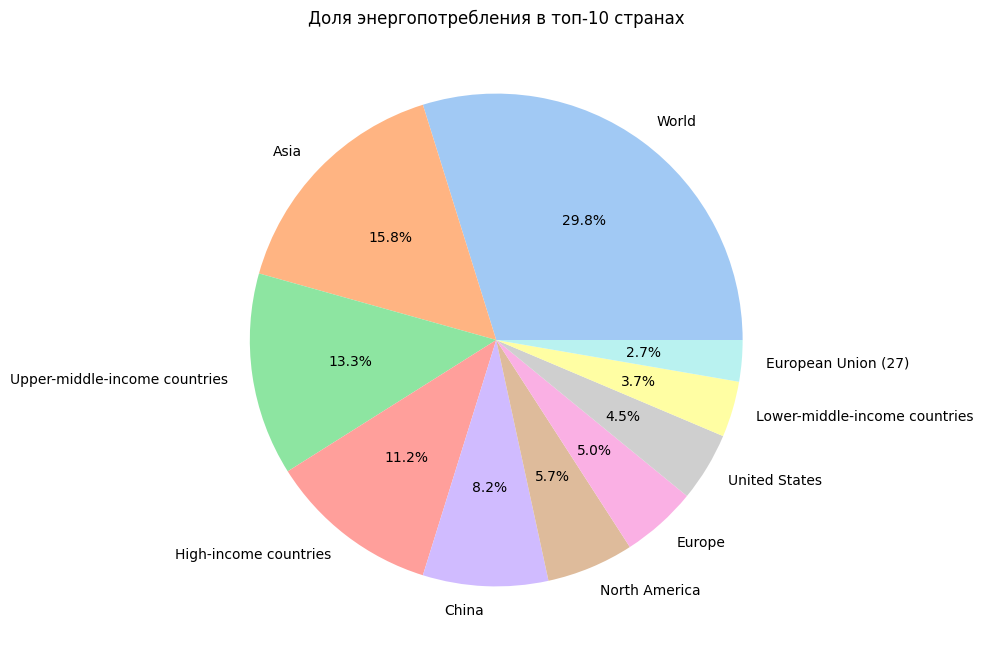

In [70]:
plt.figure(figsize=(8, 8))
top_10.set_index("Страна")["Потребление энергии (ТВт·ч)"].plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Доля энергопотребления в топ-10 странах")
plt.show()

Создаем круговую диаграмму, показывающую распределение потребления энергии среди топ-10 стран.